In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = "world-happiness-report.csv"

In [4]:
df = pd.read_csv(data)
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [8]:
cols = df.columns
country_values = df[cols[0]].value_counts()
print(f"Countries \n{country_values}")

Countries 
Zimbabwe        15
South Africa    15
Tanzania        15
Denmark         15
Tajikistan      15
                ..
Maldives         1
Suriname         1
Cuba             1
Oman             1
Guyana           1
Name: Country name, Length: 166, dtype: int64


In [9]:
df[cols[1]].value_counts()

2017    147
2011    146
2014    145
2019    144
2015    143
2012    142
2016    142
2018    142
2013    137
2010    124
2009    114
2008    110
2007    102
2020     95
2006     89
2005     27
Name: year, dtype: int64

<AxesSubplot: xlabel='count', ylabel='year'>

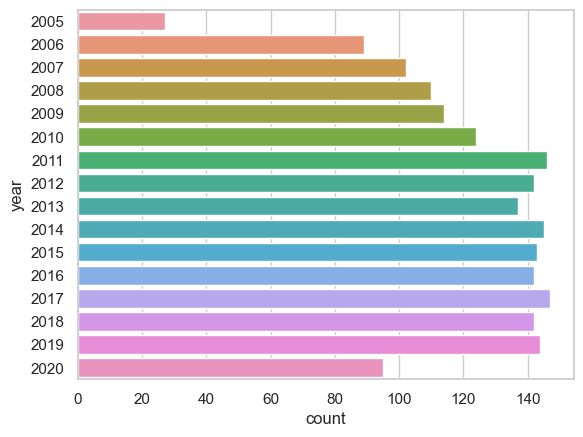

In [10]:
sns.set_theme(style="whitegrid")
sns.countplot( y= df[cols[1]] , label='count')

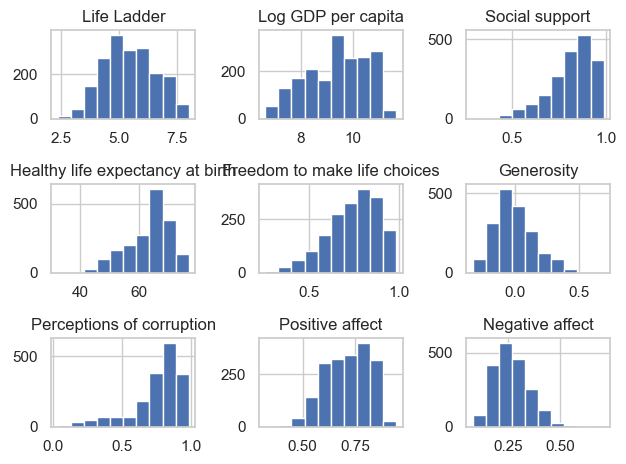

In [11]:
i = 1
for c in cols[2:]:
    plt.subplot(3, 3, i)
    plt.hist(df[c])
    plt.title((c))
    i += 1
plt.tight_layout()
plt.show()

<AxesSubplot: >

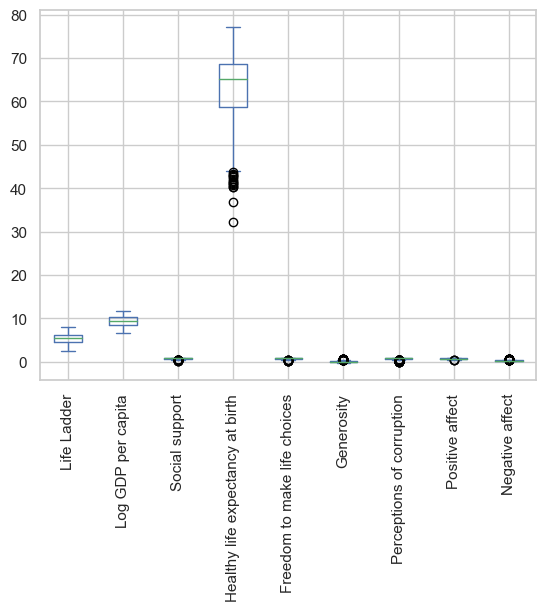

In [12]:
df.iloc[:, 2:].plot.box(rot=90)

In [13]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [14]:
for c in cols[3:]:
    df.fillna(df[c].mean(), inplace=True)
df.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [15]:
df["score"]=(
    df["Life Ladder"] + 
     df["Log GDP per capita"] + 
     df["Social support"] + 
     df["Healthy life expectancy at birth"] + 
     df["Freedom to make life choices"] + 
     df["Generosity"] + 
     df["Positive affect"]
    ) - (df["Perceptions of corruption"] + 
     df["Negative affect"]
    )

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1949 non-null   float64
 4   Social support                    1949 non-null   float64
 5   Healthy life expectancy at birth  1949 non-null   float64
 6   Freedom to make life choices      1949 non-null   float64
 7   Generosity                        1949 non-null   float64
 8   Perceptions of corruption         1949 non-null   float64
 9   Positive affect                   1949 non-null   float64
 10  Negative affect                   1949 non-null   float64
 11  score                             1949 non-null   float64
dtypes: flo

C:\Users\Asad Computers\AppData\Local\Temp\ipykernel_13212\2883418641.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='BuPu', square = True)


<AxesSubplot: >

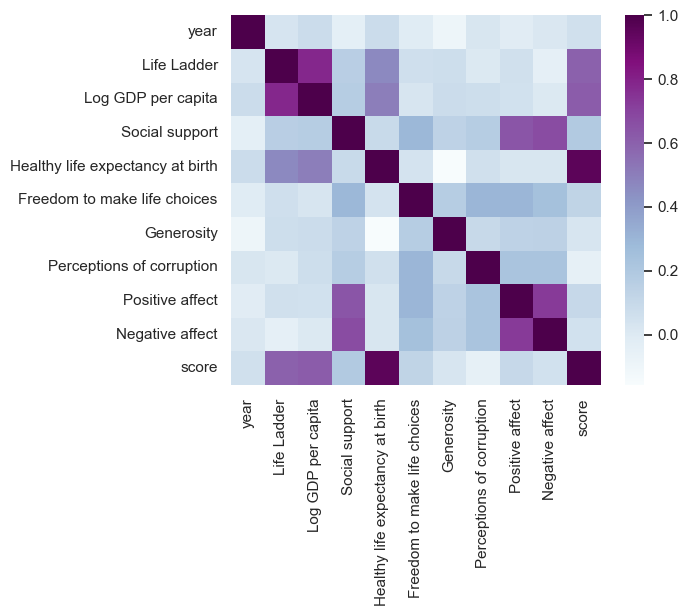

In [17]:
sns.heatmap(df.corr(), cmap='BuPu', square = True)

In [18]:
country_total = df.groupby('Country name')['score'].mean().sort_values(ascending= False).head(10)
country_total

Country name
Singapore      94.725811
Iceland        94.485182
Switzerland    94.260000
Australia      93.695175
Canada         93.643564
Japan          93.573594
Norway         93.547600
Netherlands    93.041532
Luxembourg     92.971727
New Zealand    92.834143
Name: score, dtype: float64

<AxesSubplot: ylabel='Country name'>

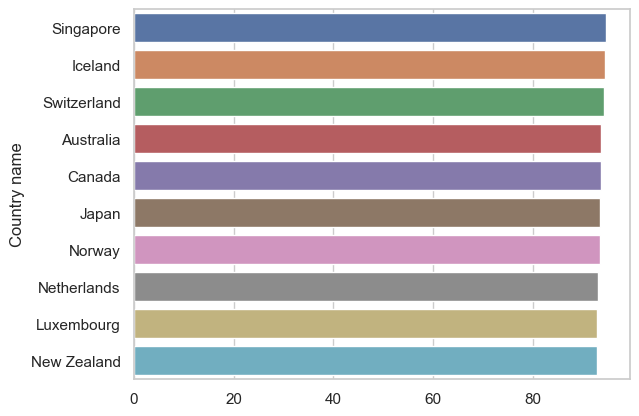

In [19]:
sns.barplot(x = country_total.values, y = country_total.index, orient='h')

In [20]:
social_country = df.groupby('Country name')['Social support'].mean().sort_values(ascending=False).head(10)
print(social_country)

Country name
Oman                    9.368453
Qatar                   4.265181
Djibouti                2.898113
Algeria                 1.874182
Bahrain                 1.651859
Kuwait                  1.645678
United Arab Emirates    1.516804
Morocco                 1.501845
Canada                  1.497764
United States           1.483764
Name: Social support, dtype: float64


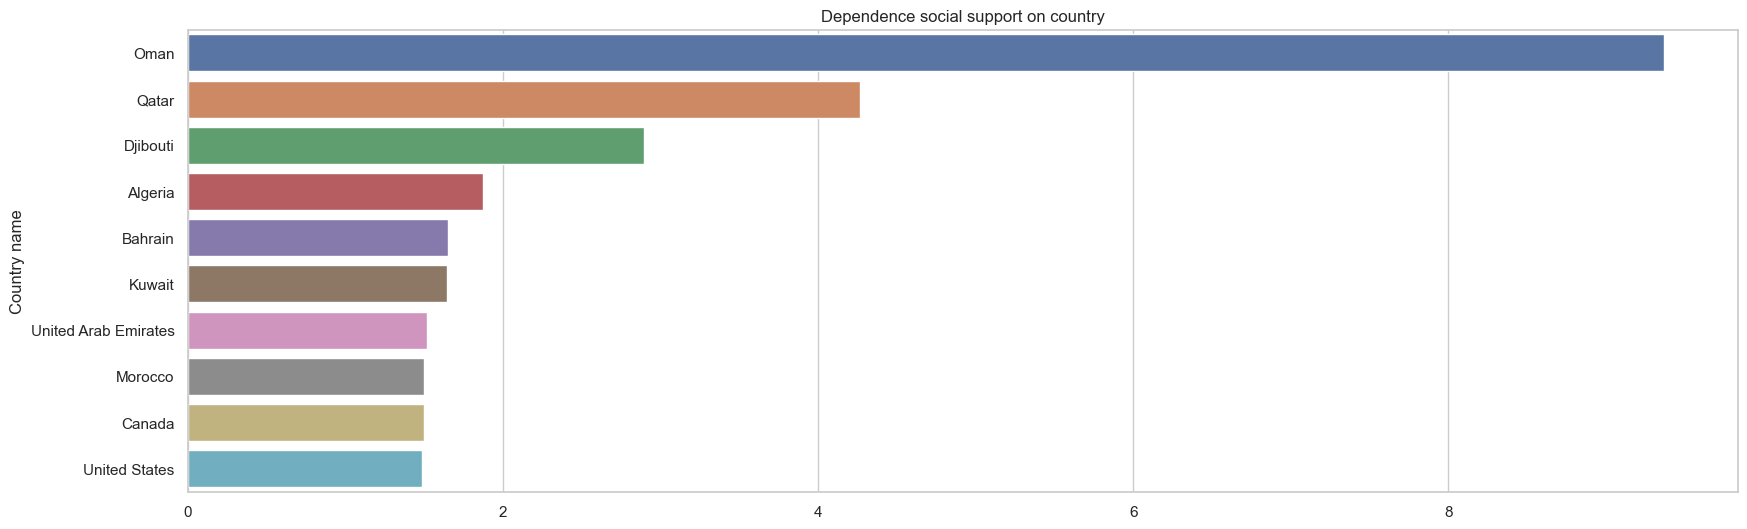

In [21]:
plt.figure(figsize=(20, 6))
sns.barplot(x = social_country.values, y = social_country.index, orient='h').set_title('Dependence social support on country')
plt.show()

In [22]:
#also we need to see bottom-10 countries by total score of happiness
total_country_bad = df.groupby('Country name')['score'].mean().sort_values(ascending=False).tail(10)
print(total_country_bad)

Country name
Haiti                        59.356909
Sierra Leone                 57.943750
Chad                         57.904143
Central African Republic     54.270000
Palestinian Territories      43.943310
Taiwan Province of China     43.585480
North Cyprus                 34.956644
Somaliland region            34.862608
Hong Kong S.A.R. of China    28.402626
Kosovo                       27.264939
Name: score, dtype: float64


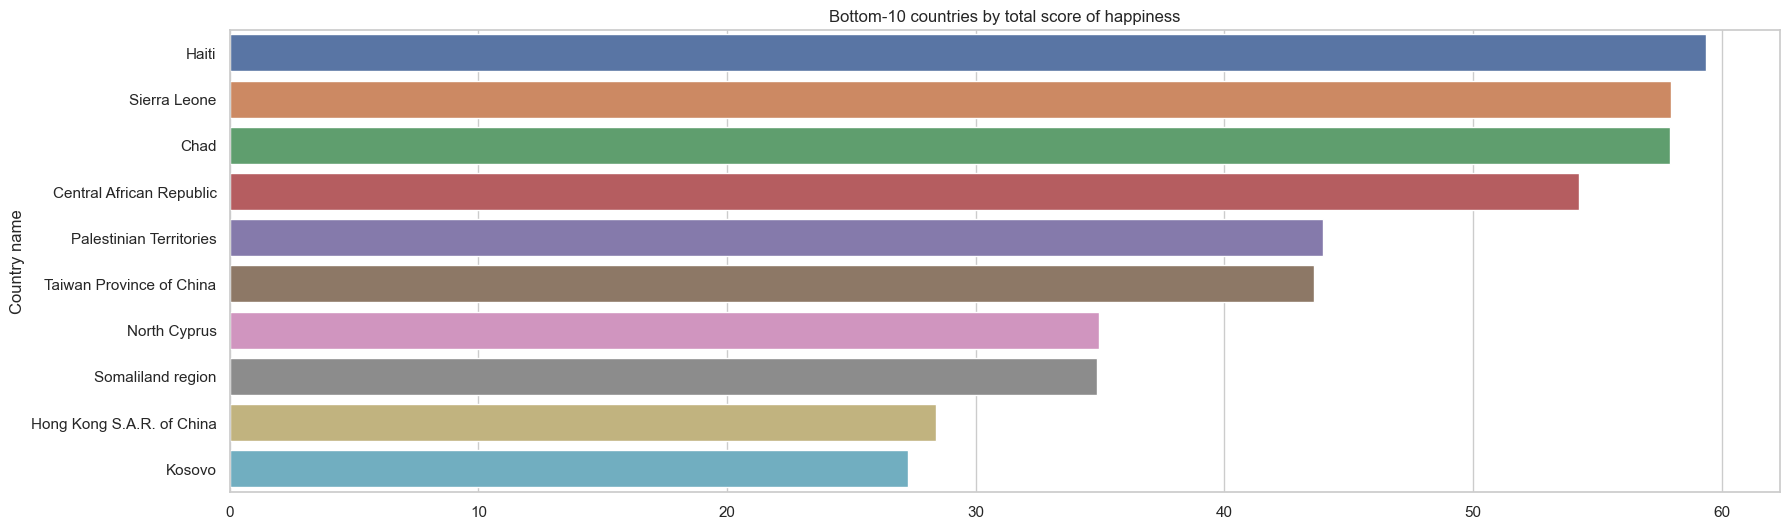

In [23]:
plt.figure(figsize=(20, 6))
sns.barplot(x = total_country_bad.values, y = total_country_bad.index, orient='h').set_title('Bottom-10 countries by total score of happiness')
plt.show()

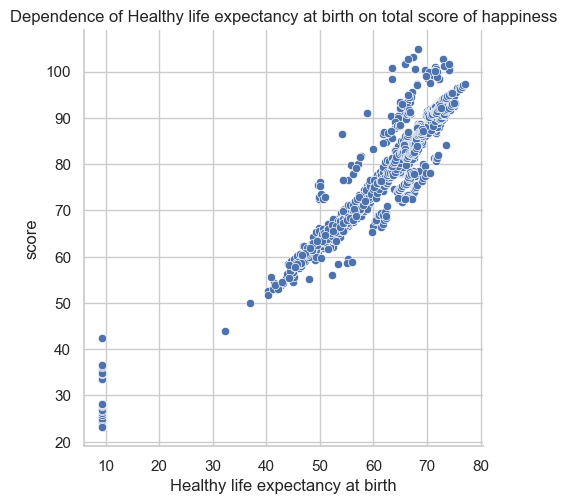

In [24]:
sns.relplot(x='Healthy life expectancy at birth', y='score', data=df, kind='scatter').set(title='Dependence of Healthy life expectancy at birth on total score of happiness')
plt.show()

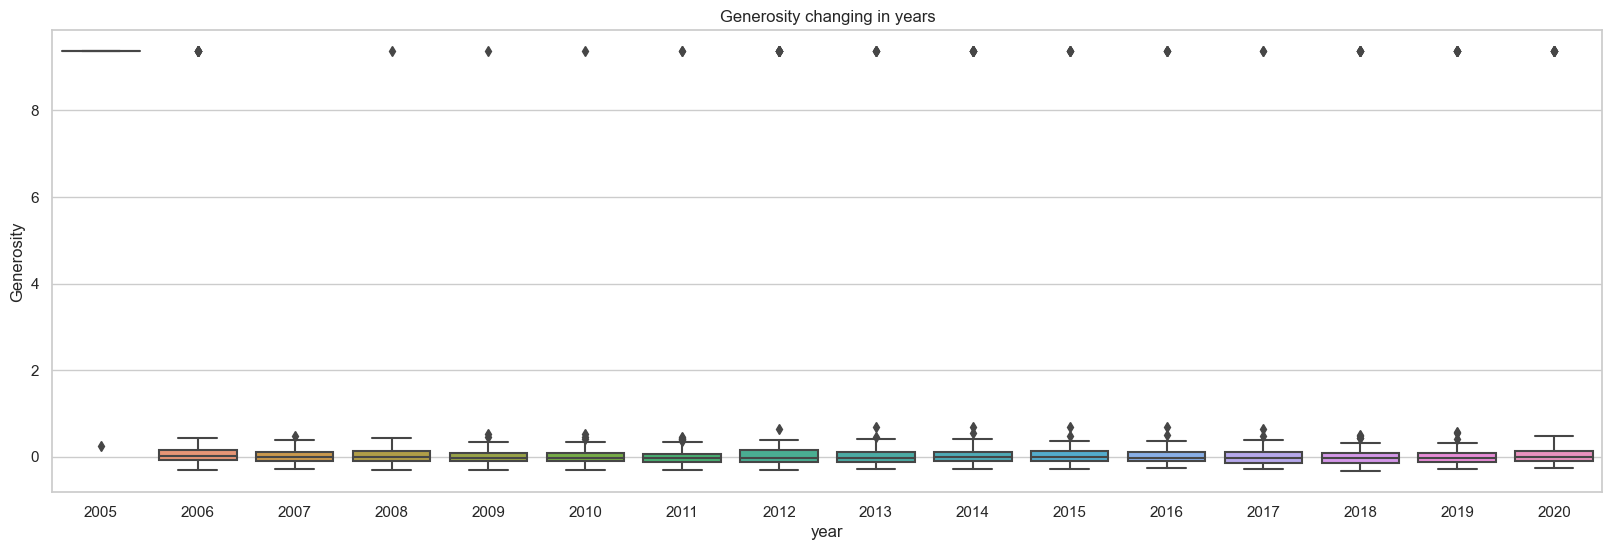

In [25]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='year', y='Generosity', data=df).set(title='Generosity changing in years')
plt.show()

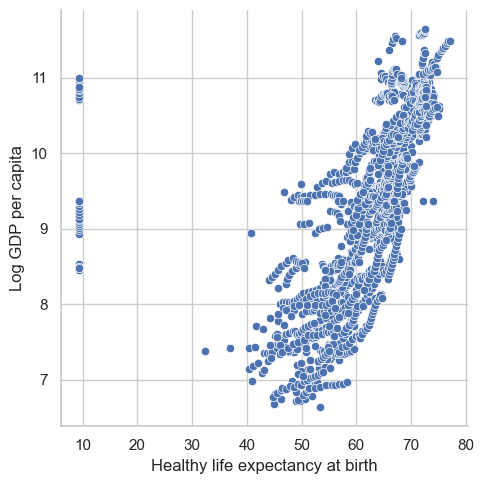

In [27]:
sns.relplot(x='Healthy life expectancy at birth', y='Log GDP per capita', data=df, kind='scatter')
plt.show()

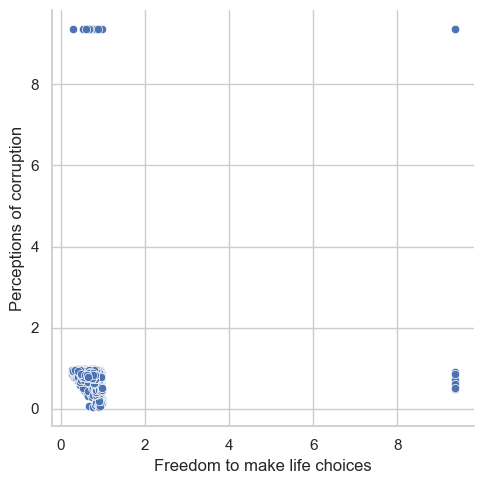

In [28]:
sns.relplot(x='Freedom to make life choices', y='Perceptions of corruption', data=df, kind='scatter')
plt.show()

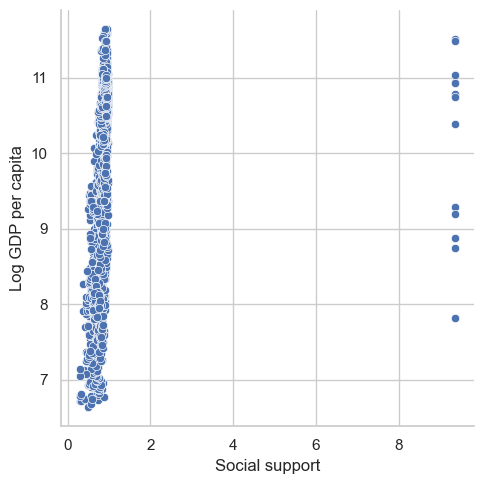

In [29]:
sns.relplot(x='Social support', y='Log GDP per capita', data=df, kind='scatter')
plt.show()

In [26]:
cols

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')